In [1]:
## AND gate for keras

#import numpy as np
#from keras.layers import Dense, Activation
#from keras.optimizers import Adadelta

X=[[0,0],[0,1],[1,0],[1,1]]
Y=[[1,0],[1,0],[1,0],[0,1]]  # [1,0]=0,[0,1]=1

X_test=X
Y_test=Y



In [2]:
import keras
from keras.models import Sequential

model = Sequential()


Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Activation
# 入力層
#model.add(Dense(input_dim=2, units=2))
# https://keras.io/ja/layers/core/
# 通常の全結合ニューラルネットワークレイヤー．
# units：正の整数，出力空間の次元数
# input_dim:入力データの次元数
layer = Dense(units=2,input_dim=2, activation='sigmoid')
#sigmoid
#softmax
#relu
model.add(layer)


In [4]:
from keras.optimizers import SGD

# 確率的勾配降下法
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy']) # lr=学習率(learning rate)


In [5]:
###
# 3.モデル学習
###
epochs = 100     # 学習繰り返し数
batch_size = 1
hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size,verbose=0)


In [6]:
###
# 4-1.評価
###
loss_and_metrics = model.evaluate(X_test, Y_test)
print()
print(loss_and_metrics)
# 可視化
val_loss = hist.history['loss']
val_acc = hist.history['acc']


4/4 [==============================] - 0s

[8.0590476989746094, 0.25]


In [7]:
loss_and_metrics

[8.0590476989746094, 0.25]

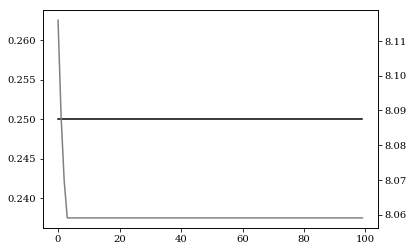

In [8]:
import os
import matplotlib.pyplot as plt

###
# 5.学習の可視化
###

plt.rc('font', family='serif')
fig = plt.figure()
# 精度
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(epochs), val_acc, label='acc', color='black')
# 損失
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epochs), val_loss, label='loss', color='gray')
plt.xlabel('epochs')

plt.show()

In [9]:
###
# 4-2.予測
###

predicted = model.predict(X_test)


In [10]:
X_test

[[0, 0], [0, 1], [1, 0], [1, 1]]

In [11]:
predicted

array([[ 0.        , -0.1963516 ],
       [-1.00893092, -0.0272893 ],
       [-0.56654799, -0.83538204],
       [-1.57547891, -0.66631973]], dtype=float32)